누가 설명한거 있나 code의 노트북들을 한번 보는게 좋겠어

Educational Purpose
- competition에서 model summit까지 마치신 분들이라면 다 아는 내용이겠지만,
- 전에 Discussion에서 Large data를 어떻게 쓸 수 있나요? 라는 질문을 발견했기에,
- This competition에 newbie 분들을 위한 education purpose의 내용을 담았습니다.

https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161

와... 근데 npy read 스피드 미쳤네 이정도면 메모리랑 비슷한 속도 되는거 아니냐? ㄸ


In [ ]:
제목 : Make 450GB dataset to nGB (for starter)

270 기가 한번에 받아야 됨...

그래서 competition 취지 라고 적은건 날려 버리고 
=> 그냥 내가 받아서 s3 올려서 가공하자

그리고 공유한다고 올리면 되지 뭐

전에 discussion에서 너무 큰 데이터셋을 어떻게 다뤄야 할지 고민하는 글을 보았습니다.

npy => read 속도가 매우 빠름
하지만 data size가 부담스러우신 분들은 차라리 jpg 파일이 더 좋으실 수 도 있을거라는 생각이 들어
데이터를 image로 굳이 다시 변환해 공유하게 되었습니다.
(여러 차례 학습을 하시고 많은 종류의 모델을 만들어보실 분들은 disk 사이즈를 많이 차지해도 npy를 쓰시는것을 추천드립니다.

label이 달려있는 데이터만 모아 놓은 케이스 <= 간단한 supervised learning test를 위해

데이터 가공 방식  
cloud 상에서 kubeflow를 사용해 spark로 데이터 재가공

제목어그로 450GB 데이터를 XX달러로 XX시간 안에 가공하기  
아키텍처 부터 클러스터링, 단위 데이터 테스트, performance monitoring까지

### 들어간 비용 xx달러
- 이게 클라우드의 매력이라고 생각함.
- 몇몇의 discussion에 High - perfomance Computer가 있어야만 competition에 참여할 수 있었냐는 질문들이 있었음.

- 이 질문에 내가 생각하는 답은 아이디어를 충분히 잘 활용하면, 수백만원 어치의 CPU + memory + disk + GPU가 없어도, competition에 참여하는것이 불가능한 것은 아니라고 생각함.

- 여기에 있어서 'at least' data preprocessing에서 만큼은, 클라우드의 scale out이 추가비용없는 high performance를 낼 수 있다는것임.

- 왜냐하면 "클라우드 위에서, 교환법칙이 성립하는 모든 연산에 대해, one computer를 1000시간 동작하는 것과 1000computer를 1시간 동작하는 것의 비용이 동일하기 때문에"
- 오로지 Data의 size만이 cost에 영향을 미치기 때문이다.



케글에 올릴때,


0. 가장 중요한 것을 가장 위에 올립니다.
데이터를 최대 ~~GB까지 줄임. 데이터를 공유함.
(어떤 형태인지, 어떻게 줄였는지는 아래 기술)

1. competition의 취지로 보여지는 것
=> 데이터를 살펴보면
일반적인 사진 데이터는
png, jpg등의 압축된 파일로 저장 됨.

근데 데이터셋에는 numpy array를 저장한, npy포맷의 파일들로 구성이 되어 있음.

이는 사진 보다 훨씬 스토리지 용량을 많이 차지하는 방식임. 

또한 npy파일은 (256,256) 사이즈의 사진이 8장 겹쳐 있는 형태로 (256,256,8)의 포맷을 형성하고 있음.

그래서 아마도 처음부터 어떻게 하면 데이터를 효율적으로 가공해, 저장해서 쓸 것인가를 평가하기위해 일부러 정한 포맷인가 싶기도 함.

2. 1의 전제를 두고 생각해봤을때, 데이터를 줄일수 있다고 한다면,
1) 450GB 중 50GB를 다운로드
2) 50GB를 충분히 작게 (예를 들어 5GB) 줄일 수 있다면
3) 1)->2)를 반복하면 디스크 용량을 거의 사용하지 않고 데이터를 전부 저장할 수 있음.

3. 그럼 데이터를 어떻게 가공해야 하는가? 2의 방법이 가능한가?
competition을 몇 종류 참여해 본 사람은 당연히 알겠지만, 이미지는 jpg등의 이미지 파일로 저장하면 크기가 기하급수적으로 줄어들음 (image 파일은 압축을 거치기 때문)

그러면 image 파일로 변경했을때 450GB 가 어느정도 사이즈로 줄어들지 한장의 이미지를 가지고 대략적인 계산을 할 수가 있습니다.
(아래 계산)


여기에서 멈추지 않습니다.
cnn base의 image model을 만들어 본 적 있는 분들이라면 아시겠지만 256,256은 cnn에 넣기에 작은 사이즈의 이미지는 아닙니다. 더 질 좋은 데이터를 위해 computing resource를 사용할 의향이 있다면 몰라도 그게 아니라고 한다면 모델 성능의 일부를 trade off로 희생하고, 이미지 사이즈를 줄이는 것도 하나의 방법이 될 수 있습니다.

아래는 각각
256,256
128,128
64,64
32,32
의 규격으로 npy 파일로 저장했을때, image 파일로 저장했을때의 용량을 각각 표기해 보았습니다.

4. 그래서 이 competition에서의 가장 이상적인 형태의 데이터 저장 방법은,

450GB 이미지 중 일부를 나누어 받아 원하는 규격으로 데이터를 줄인후,
나머지를 계속해서 다운로드 받는 것 이라고 할 수 있겠습니다.


5. 그럼에도 불구하고,
=> 처음부터 고성능 컴퓨팅 장비를 요구한게 아니라
=> 데이터를 나눠서 가공하면서 동시에 저장하라는 의미로 낸 competition이겠지만,

오히려 나는 그렇게 하지 않고 한번에 처리 했음.

=> 왜냐면, "교환법칙이 존재하는 모든 연산에 대해서 클라우드는, 데이터 양 == 시간일뿐, 리소스 == 비용이 아니라는 점을 보이기 위해서" 클라우드 인스턴스의 scale out으로 "합리적인 비용 안에서" 최단시간에 가공이 되는 모습을 보이려고 함.


동시에 여러 인스턴스가 돌아가면서 데이터를 처리한 것과,
인스턴스 한개가 돌아가면서 처리한 결과의 "클라우드 비용"이 거의 동일하는 것을 보여

"같은 비용"으로 몇 배 이상의 시간을 내는 클라우드의 모습을 보이는 것으로 이 설명을 마무리 하고자 합니다.
(물론 사원의 입장에서 공짜로 쓸 수 있는 회사나 연구소의 온프레미스 장비와는 가격경쟁이 안되겠지만...)

pipeline 올리고, 과정 올리고,

실행영상정도 올리면 깔끔할듯



In [1]:
import numpy as np

In [2]:
data = np.load("band_09.npy")

In [3]:
data.shape

(256, 256, 8)

In [4]:
type(data)

numpy.ndarray

In [5]:
data[:,:,0].shape

(256, 256)

In [6]:
#!pip install opencv-python

In [7]:
import cv2

In [8]:
resized = cv2.resize(data, dsize=(32,32))

In [9]:
resized.shape

(32, 32, 8)

In [10]:
#7GB 로 데이터를 줄일 수가 있음 => good for education
450 / (256 * 256 / 32 / 32)

7.03125

In [11]:
import matplotlib.pyplot as plt

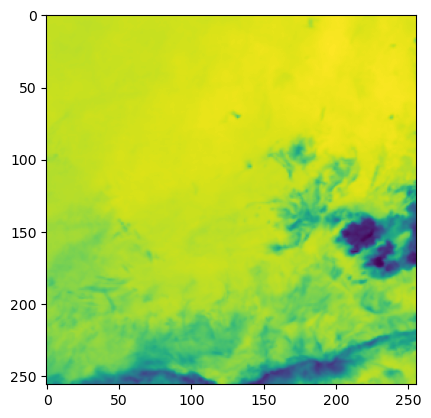

In [12]:
plt.imshow(data[:,:,0])

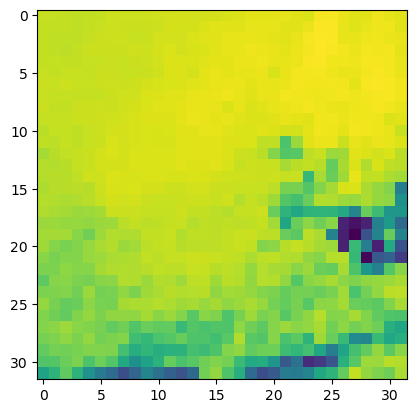

In [13]:
plt.imshow(resized[:,:,0])

In [14]:
np.save("band_09_3232",resized)

In [15]:
for i in range(8):
    cv2.imwrite('band_09_3232_'+str(i)+'.jpg', resized[:,:,i])

In [23]:
256*256 / 32 / 32

64.0

In [ ]:
실행전 가설 => 32,32로 줄이면 1/64가 될것이다.

### 정리

## 기존 band_09.npy 용량 : 2.00MB

## 32,32로 줄인 후 band_09_3232_npy 용량 : 32.1KB

## 32,32로 줄인 후 8개 각각 사진파일로 저장
## 이미지는 압축률이 높기 때문에 그냥 저장보다 용량이 더 많이 줄어들음. 근데 읽는 속도가 npy가 더빠르려나?
total : 3550 byte 3.466796875 KB  
0 : 438 byte  
1 : 443  
2 : 444  
3 : 440  
4 : 447  
5 : 447  
6 : 443  
7 : 448  


In [25]:
(2*1024) / 32.1

63.8006230529595

In [26]:
(2*1024) / 3.47

590.2017291066282

# 단순계산으로 1/63 사이즈가 되어 버림 => 가설이 거의 맞았고, 그나마도 이미지로 저장하면 1/590 사이즈가 됨.

In [27]:
32.1 / 3.47

9.250720461095101

In [ ]:
256,256 => img == 2 / 9.2

In [28]:
2 / 9.2

0.2173913043478261

In [ ]:
200kb... => 450 / 9.2

In [29]:
450 / 9.2

48.913043478260875

In [ ]:
48기가가 됨. 와 사이즈가 크긴 크구나.

In [ ]:
가설이 거의 맞았기 때문에 128 , 64도 마찬가지로 계산 가능할듯

In [33]:
data_size = 450
npy_to_img_rate = 9.2
after_img = data_size/npy_to_img_rate

data_area = 256*256
resize_list = [128, 64, 32]

print(data_size, "GB Dataset")
print("if it is img", data_size/npy_to_img_rate)
for i in range(3):
    after_resize_npy = data_size / (data_area / (resize_list[i] * resize_list[i]))
    after_resize_jpg = after_resize_npy / npy_to_img_rate
    
    print(resize_list[i], "th turn")
    print("npy_size : ", after_resize_npy, 'GB')
    print("img_size : ", after_resize_jpg, 'GB')

450 GB Dataset
if it is img 48.913043478260875
128 th turn
npy_size :  112.5 GB
img_size :  12.228260869565219 GB
64 th turn
npy_size :  28.125 GB
img_size :  3.0570652173913047 GB
32 th turn
npy_size :  7.03125 GB
img_size :  0.7642663043478262 GB


In [ ]:
유일한 걱정은 resize 하면서 구름 픽셀이 사라지나 하는 건데
무조건 값을 남기라고 하면 되려나? interpolation을 잘 하면 되려나?

In [ ]:
위 데이터 들을 종류별로 다 준비해서 올리면 어그로로 좋을거 같은데?
=> 근데 112 gb 28gb는 좀 그렇고, img로 만들어서 npy로 바꾸는 코드랑 같이 올려주면 될듯?

그럼 다 합쳐도 15GB가 안될테니까

In [15]:
a=[438,
443,
444,
440,
447,
447,
443,
448]

In [16]:
np.sum(a)

3550

In [17]:
np.sum(a)/1024

3.466796875

In [ ]:
중복제거 => 완전히 동일한 용량의 이미지끼리 모아서
=> 이들끼리 RGB가 완전히 같은지 비교하면 되지 않을까?